In [1]:
import pandas as pd 
import numpy as np
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

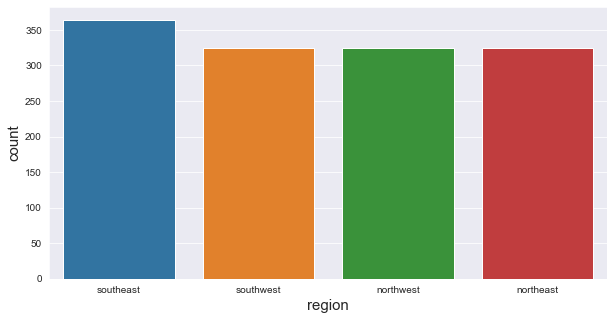

In [6]:
region_lbl = df.region.value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(region_lbl.index, region_lbl);
plt.xlabel('region', fontsize = 15);
plt.ylabel('count', fontsize = 15);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


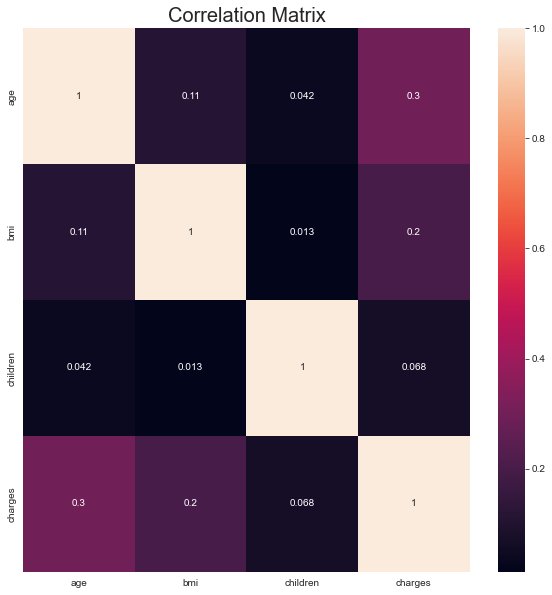

In [8]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20);

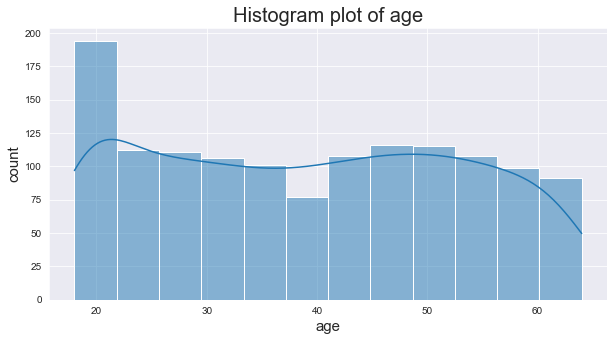

In [9]:
plt.figure(figsize = (10, 5))
sns.histplot(df['age'], kde = True);
plt.xlabel('age', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Histogram plot of age', fontsize = 20);

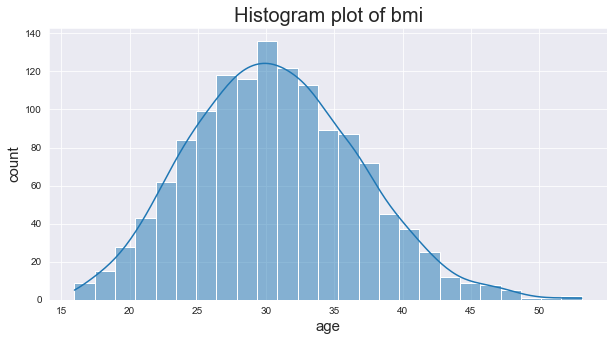

In [10]:
plt.figure(figsize = (10, 5))
sns.histplot(df['bmi'], kde = True);
plt.xlabel('age', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Histogram plot of bmi', fontsize = 20);

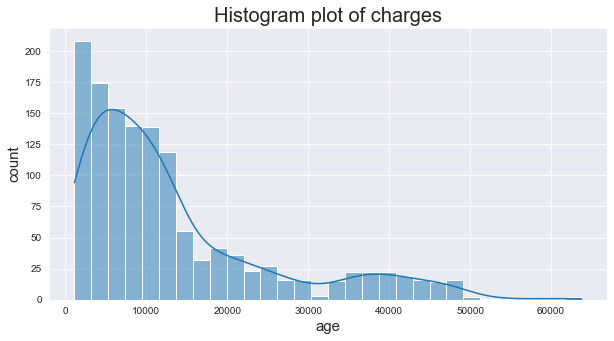

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(df['charges'], kde = True);
plt.xlabel('age', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Histogram plot of charges', fontsize = 20);

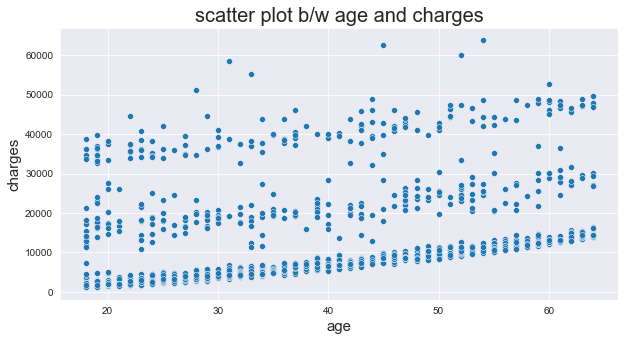

In [12]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'age', y = 'charges', data = df)
plt.xlabel('age', fontsize = 15)
plt.ylabel('charges', fontsize = 15)
plt.title('scatter plot b/w age and charges', fontsize = 20);

In [13]:
df.corr()['charges'].sort_values(ascending = False)[1:]

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df['smoker'] = np.where(df.smoker == 'yes', 1, 0)
df['sex'] = np.where(df.sex == 'male', 1, 0)

region_lbl = {value: key for key, value in enumerate(df.region.unique())}
df.region = df.region.map(region_lbl)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [17]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [19]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [21]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (1070, 6)
X_test shape:  (268, 6)


In [22]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
lg = LinearRegression()

lg.fit(X_train, Y_train)

LinearRegression()

In [24]:
pred = lg.predict(X_test)

print("R2 Score: ", r2_score(Y_test, pred))

R2 Score:  0.7998591998802312


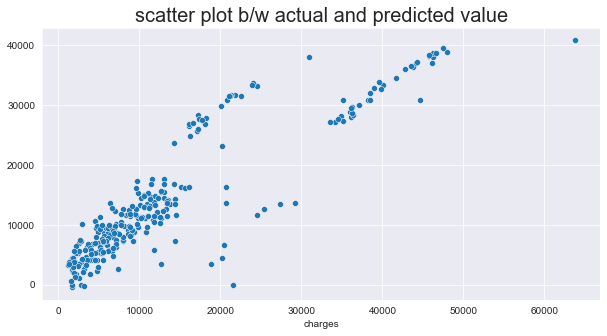

In [25]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = Y_test, y = pred)
plt.title('scatter plot b/w actual and predicted value', fontsize = 20);